# *Fuel Efficiency Prediction*

### Importing Required Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mean_sq_err


### Loading the Dataset

In [3]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", sep='\s+', names=columns)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Data Preprocessing

In [4]:
filtered_cars = cars[cars["horsepower"] != '?'].copy()  
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype(float)
filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Visualizing Data

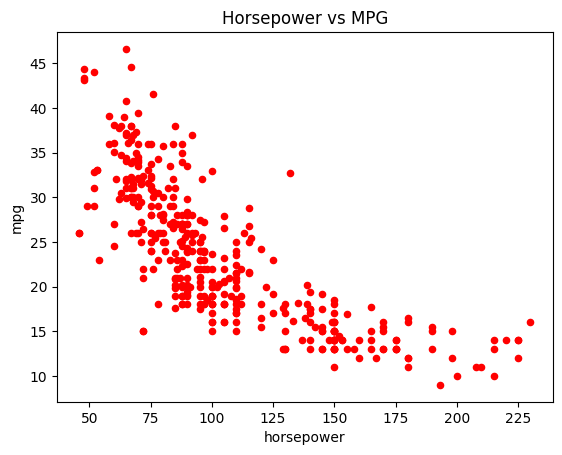

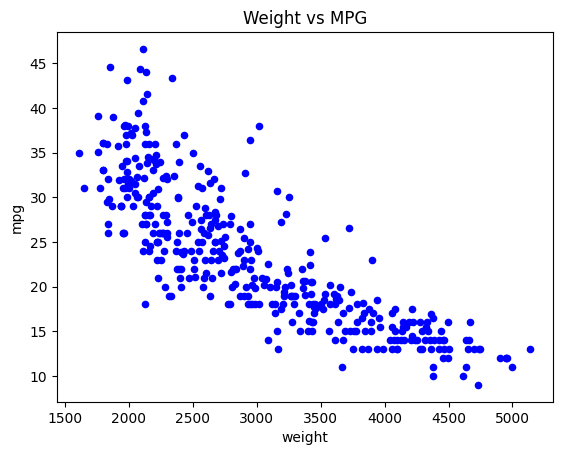

In [5]:
filtered_cars.plot('horsepower', 'mpg', kind='scatter', c='red', title='Horsepower vs MPG')
filtered_cars.plot('weight', 'mpg', kind='scatter', c='blue', title='Weight vs MPG')
plt.show()

### Training the Linear Regression Model

In [6]:
lr = LinearRegression()
lr.fit(filtered_cars[['horsepower', 'weight']], filtered_cars['mpg'])
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [-0.04730286 -0.00579416]
Intercept: 45.640210840177126


###  Model Evaluation 

In [7]:
train_predictions = lr.predict(filtered_cars[['horsepower', 'weight']])
mse = mean_sq_err(filtered_cars['mpg'], train_predictions)
print("Mean Squared Error =", mse)
rmse = mse ** 0.5
print("Root Mean Squared Error =", rmse)

Mean Squared Error = 17.84144244255059
Root Mean Squared Error = 4.223913167023038


### User Input for Prediction

In [8]:
def predict_mpg():
    try:
        horsepower = float(input("Enter the horsepower: "))
        weight = float(input("Enter the weight: "))
    except ValueError:
        print("Invalid input! Please enter numerical values.")
        return
    input_data = pd.DataFrame({'horsepower': [horsepower], 'weight': [weight]})
    predicted_mpg = lr.predict(input_data)[0]
    print(f"Predicted mpg for {horsepower} horsepower and {weight} weight: {predicted_mpg:.2f}")
predict_mpg()

Enter the horsepower:  110
Enter the weight:  2800


Predicted mpg for 110.0 horsepower and 2800.0 weight: 24.21
